# Balancing the Dataset using pandas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
path = "./dataJoe/"

In [2]:
df =pd.read_csv(path+'dataset.csv')
classG = df[df['class'] == 'g']
classH = df[df['class'] == 'h']
countG, countH = df['class'].value_counts()

In [3]:
classGUnder = classG.sample(countH)

In [4]:
newDataset = pd.concat([classGUnder, classH])

In [5]:
df.to_csv(path+'balanced_dataset.csv',index=True)

# Data Split

In [6]:
traindf, testdf = train_test_split(newDataset, test_size=0.3,random_state=42,shuffle=True)

In [7]:
traindf.to_csv(path+'train_dataset.csv',index=True)
testdf.to_csv(path+'test_dataset.csv',index=True)
x= newDataset.drop('class',axis=1) # 1 for column, 0 for index
y= newDataset['class']
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True)

# Splitting Train dataset into folds

# Importing the models

In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

# Decision Tree

# AdaBoost

# KNN

# Random Forest

# Naive Bayes

In [11]:
model = GaussianNB()

In [12]:
model.fit(x_train,y_train)

GaussianNB()

In [13]:
y_pred = model.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.61      0.89      0.72      2024
           h       0.79      0.41      0.54      1989

    accuracy                           0.66      4013
   macro avg       0.70      0.65      0.63      4013
weighted avg       0.70      0.66      0.64      4013



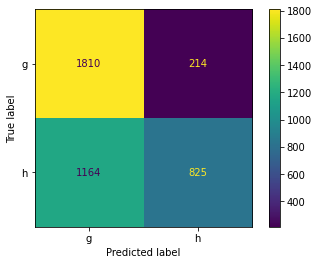

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()